In [37]:
# !pip install rasterio
import rasterio as ro
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

In [23]:
DTM = ro.open("data/pre_DTM.tif")
DSM = ro.open("data/pre_DSM.tif")

In [15]:
# What are the numbers of band(s) of these two raster datasets? (10 pts)
print(DTM.count)
print(DSM.count)
# Both datasets has 1 band

1
1


In [25]:
# What are the heights and widths of these two raster datasets? (10 pts)
print(DTM.width)
print(DTM.height)
print(DSM.width)
print(DSM.height)
# DTM width:4000/ height:2000
# DSM width:4000/ height:2000

4000
2000
4000
2000


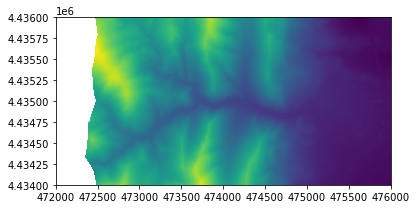

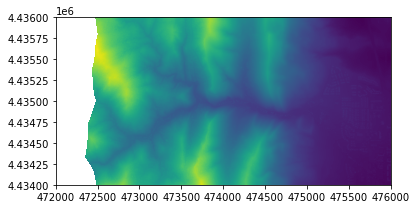

<AxesSubplot:>

In [26]:
# Plot out these two datasets using their default visualization. (10 pts)
show(DTM)
show(DSM)

In [77]:
dtm_data = DTM.read(1,masked=True)
dsm_data = DSM.read(1,masked=True)
heights = dsm_data - dtm_data
# What are the maximum and minimum heights? (20 pts)
print(heights.max())
print(heights.min())
# Max hight: 26.93 // Min:0.00

26.930054
0.0


(array([5.69269e+06, 4.26245e+05, 3.26238e+05, 2.70872e+05, 1.95188e+05,
        1.21300e+05, 7.01040e+04, 3.45250e+04, 1.40440e+04, 4.85100e+03,
        1.31400e+03, 3.03000e+02, 5.00000e+01, 4.00000e+00, 0.00000e+00]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
 <BarContainer object of 15 artists>)

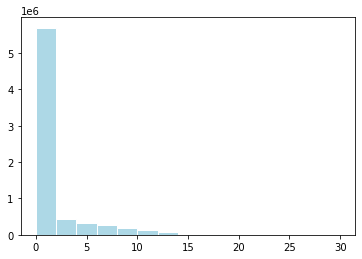

In [41]:
# Create a histogram of the heights, and set the bins as range(0,31,2). (10 pts)
plt.hist(heights.ravel(), bins=range(0,31,2), color="lightblue", edgecolor="white")

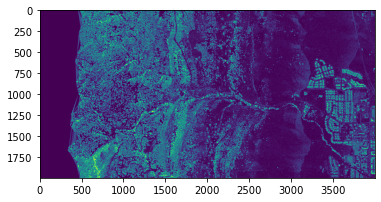

<AxesSubplot:>

In [84]:
# Use the np.digitize function to perform the reclassification of heights, and visualize the reclassified raster. (30 pts)
bins = np.array([0.0, 2.0, 7.0, 12.0])
inds = np.digitize(heights, bins,right=True); 
show(inds)

In [85]:
#  Save your reclassification result into a new raster (10 pts)
new_dataset = ro.open("new_raster","w",driver="GTiff",
                      width= 4000,
                      height=2000,
                      count=1,
                      dtype=heights.dtype,
                      crs = DTM.crs,
                      transform = DTM.transform)
inds_new = inds.astype(heights.dtype)
new_dataset.write(inds_new, 1)
new_dataset.close()

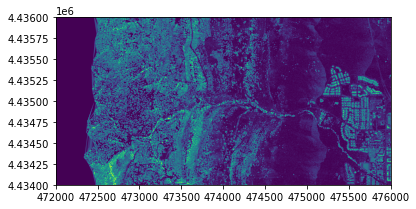

<AxesSubplot:>

In [81]:
tt = ro.open("new_raster")
show(tt)